In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

False

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X=df.drop('Outcome',axis=1).values   #independent features
y=df['Outcome'].values               #dependent features

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# Importing Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)#.cuda()
X_test=torch.FloatTensor(X_test)#.cuda()
y_train=torch.LongTensor(y_train)#.cuda()
y_test=torch.LongTensor(y_test)#.cuda()

In [ ]:
X_train.device

device(type='cpu')

In [ ]:
# Creating Model
import numpy as np
class Model(nn.Module):
    def __init__(self,input_features=8,hidden1=6,hidden2=4,out_features=2):
        super().__init__()
        self.fc1=nn.Linear(input_features,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.fc3=nn.Linear(hidden2,out_features)
        self.init_weights() 

    def init_weights(self):
        initrange =  1.0/np.sqrt(8)
        self.fc1.weight.data.uniform_(-initrange, initrange)
        self.fc1.bias.data.zero_()
        self.fc2.weight.data.uniform_(-initrange, initrange)
        self.fc2.bias.data.zero_()
        self.fc3.weight.data.uniform_(-initrange, initrange)
        self.fc3.bias.data.zero_()

    def forward(self,x): #data
        x=F.leaky_relu(self.fc1(x))
        x=F.leaky_relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
#instantiate model
torch.manual_seed(42)
model=Model()

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=8, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=2, bias=True)
)>

In [ ]:
# Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
# !pip install pytorch_lightning

In [ ]:

# from pytorch_lightning import Trainer
# from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
import time
start_time=time.time()
epochs=19491
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(time.time()-start_time)

Epoch number: 1 and the loss : 1.3806086778640747
Epoch number: 11 and the loss : 0.6914448738098145
Epoch number: 21 and the loss : 0.6610839366912842
Epoch number: 31 and the loss : 0.6500107049942017
Epoch number: 41 and the loss : 0.6452186703681946
Epoch number: 51 and the loss : 0.6431975960731506
Epoch number: 61 and the loss : 0.64020836353302
Epoch number: 71 and the loss : 0.6273632645606995
Epoch number: 81 and the loss : 0.6159167885780334
Epoch number: 91 and the loss : 0.5986152291297913
Epoch number: 101 and the loss : 0.5843701958656311
Epoch number: 111 and the loss : 0.5725792050361633
Epoch number: 121 and the loss : 0.5595207214355469
Epoch number: 131 and the loss : 0.548388659954071
Epoch number: 141 and the loss : 0.5393821597099304
Epoch number: 151 and the loss : 0.5284132361412048
Epoch number: 161 and the loss : 0.5170630812644958
Epoch number: 171 and the loss : 0.506851315498352
Epoch number: 181 and the loss : 0.49816158413887024
Epoch number: 191 and the 

In [ ]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fi_los = [fl.item() for fl in final_losses ] #to get values as just numbers and not as tensors

Text(0.5, 0, 'Epoch')

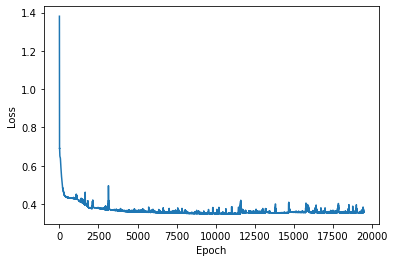

In [ ]:
plt.plot(range(epochs),fi_los)
plt.ylabel('Loss')
plt.xlabel('Epoch')

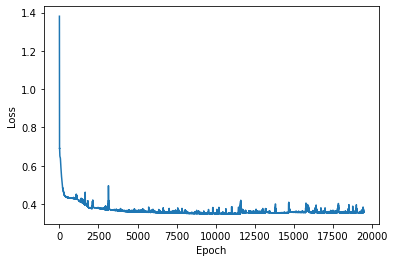

In [ ]:
with torch.no_grad():
  plt.plot(range(epochs),final_losses)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

In [ ]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        # print(y_pred)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[81, 18],
       [17, 38]])

Text(0.5, 33.0, 'Predicted Values')

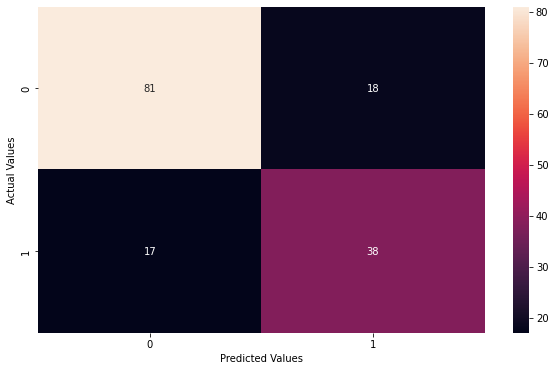

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions) #RMSProp 0.727  SGD 0.746
score # 0.7727 lrelu , 0.74 swish , 0.759 relu

0.7727272727272727

In [ ]:
#Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

Model(
  (fc1): Linear(in_features=8, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=2, bias=True)
)

In [ ]:
lst1=[1.0,	84.0 ,	65.0 ,	30.0,	0.0,	26.6,	0.351	,31.0]

In [ ]:
new_data=torch.tensor(lst1)

In [ ]:
# Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data).argmax().item())

0
